In [1]:
%matplotlib inline


# Within Session SSVEP

This Example show how to perform a within-session SSVEP analysis on the
MAMEM dataset 3, using a CCA pipeline.

The within-session evaluation assesses the performance of a classification
pipeline using a 5-fold cross-validation. The reported metric (here, accuracy)
is the average of all fold.


In [2]:
# Authors: Sylvain Chevallier <sylvain.chevallier@uvsq.fr>
#
# License: BSD (3-clause)

import warnings

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import make_pipeline

import moabb
from moabb.datasets import MAMEM3
from moabb.evaluations import WithinSessionEvaluation
from moabb.paradigms import SSVEP
from moabb.pipelines import SSVEP_CCA


warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.simplefilter(action="ignore", category=RuntimeWarning)
moabb.set_log_level("info")

## Loading Dataset

Load 2 subjects of MAMEM3 dataset



In [3]:
#subj = [1, 3]
dataset = MAMEM3()
#dataset.subject_list = subj
dataset.allow_add_noise()

#raw = dataset.get_data()[1]['0']['0']

## Choose Paradigm

We select the paradigm SSVEP, applying a bandpass filter (3-15 Hz) on
the data and we keep only the first 3 classes, that is stimulation
frequency of 6.66, 7.50 and 8.57 Hz.



In [4]:
paradigm = SSVEP(fmin=3, fmax=15, n_classes=3)

2024-07-25 22:25:34,965 WARNING MainThread moabb.paradigms.ssvep Choosing the first 3 classes from all possible events


## Create Pipelines

Use a Canonical Correlation Analysis classifier



In [5]:
interval = dataset.interval
freqs = paradigm.used_events(dataset)

pipeline = {}
pipeline["CCA"] = make_pipeline(SSVEP_CCA(interval=interval, freqs=freqs, n_harmonics=3))

## Get Data (optional)

To get access to the EEG signals downloaded from the dataset, you could
use `dataset.get_data(subjects=[subject_id])` to obtain the EEG under
MNE format, stored in a dictionary of sessions and runs.
Otherwise, `paradigm.get_data(dataset=dataset, subjects=[subject_id])`
allows to obtain the EEG data in scikit format, the labels and the meta
information. In `paradigm.get_data`, the EEG are preprocessed according
to the paradigm requirement.



In [6]:
# sessions = dataset.get_data(subjects=[3])
# X, labels, meta = paradigm.get_data(dataset=dataset, subjects=[3])

## Evaluation

The evaluation will return a DataFrame containing a single AUC score for
each subject and pipeline.



In [7]:
overwrite = True  # set to True if we want to overwrite cached results

evaluation = WithinSessionEvaluation(
    paradigm=paradigm, datasets=dataset, suffix="examples", overwrite=overwrite
)
results = evaluation.process(pipeline)

print(results.head())

2024-07-25 22:25:35,095 INFO MainThread moabb.evaluations.base Processing dataset: MAMEM3
MAMEM3-WithinSession:   0%|          | 0/10 [00:00<?, ?it/s]/Users/skpaul/Library/Python/3.9/lib/python/site-packages/moabb/datasets/preprocessing.py:279: UserWarning: warnEpochs <Epochs |  6 events (all good), 1 – 4 s, baseline off, ~278 kB, data loaded,
 '6.66': 2
 '7.50': 2
 '8.57': 2>
  warn(f"warnEpochs {epochs}")
/Users/skpaul/Library/Python/3.9/lib/python/site-packages/moabb/datasets/preprocessing.py:279: UserWarning: warnEpochs <Epochs |  5 events (all good), 1 – 4 s, baseline off, ~236 kB, data loaded,
 '6.66': 2
 '7.50': 0
 '8.57': 3>
  warn(f"warnEpochs {epochs}")
/Users/skpaul/Library/Python/3.9/lib/python/site-packages/moabb/datasets/preprocessing.py:279: UserWarning: warnEpochs <Epochs |  5 events (all good), 1 – 4 s, baseline off, ~236 kB, data loaded,
 '6.66': 2
 '7.50': 1
 '8.57': 2>
  warn(f"warnEpochs {epochs}")
/Users/skpaul/Library/Python/3.9/lib/python/site-packages/moabb/dat

No hdf5_path provided, models will not be saved.


MAMEM3-WithinSession:  10%|█         | 1/10 [00:01<00:17,  1.91s/it]/Users/skpaul/Library/Python/3.9/lib/python/site-packages/moabb/datasets/preprocessing.py:279: UserWarning: warnEpochs <Epochs |  6 events (all good), 1 – 4 s, baseline off, ~278 kB, data loaded,
 '6.66': 1
 '7.50': 3
 '8.57': 2>
  warn(f"warnEpochs {epochs}")
/Users/skpaul/Library/Python/3.9/lib/python/site-packages/moabb/datasets/preprocessing.py:279: UserWarning: warnEpochs <Epochs |  5 events (all good), 1 – 4 s, baseline off, ~236 kB, data loaded,
 '6.66': 1
 '7.50': 1
 '8.57': 3>
  warn(f"warnEpochs {epochs}")
/Users/skpaul/Library/Python/3.9/lib/python/site-packages/moabb/datasets/preprocessing.py:279: UserWarning: warnEpochs <Epochs |  7 events (all good), 1 – 4 s, baseline off, ~320 kB, data loaded,
 '6.66': 1
 '7.50': 3
 '8.57': 3>
  warn(f"warnEpochs {epochs}")
/Users/skpaul/Library/Python/3.9/lib/python/site-packages/moabb/datasets/preprocessing.py:279: UserWarning: warnEpochs <Epochs |  7 events (all good)

No hdf5_path provided, models will not be saved.


MAMEM3-WithinSession:  20%|██        | 2/10 [00:03<00:15,  1.90s/it]/Users/skpaul/Library/Python/3.9/lib/python/site-packages/moabb/datasets/preprocessing.py:279: UserWarning: warnEpochs <Epochs |  7 events (all good), 1 – 4 s, baseline off, ~320 kB, data loaded,
 '6.66': 1
 '7.50': 3
 '8.57': 3>
  warn(f"warnEpochs {epochs}")
/Users/skpaul/Library/Python/3.9/lib/python/site-packages/moabb/datasets/preprocessing.py:279: UserWarning: warnEpochs <Epochs |  6 events (all good), 1 – 4 s, baseline off, ~278 kB, data loaded,
 '6.66': 0
 '7.50': 3
 '8.57': 3>
  warn(f"warnEpochs {epochs}")
/Users/skpaul/Library/Python/3.9/lib/python/site-packages/moabb/datasets/preprocessing.py:279: UserWarning: warnEpochs <Epochs |  6 events (all good), 1 – 4 s, baseline off, ~278 kB, data loaded,
 '6.66': 1
 '7.50': 2
 '8.57': 3>
  warn(f"warnEpochs {epochs}")
/Users/skpaul/Library/Python/3.9/lib/python/site-packages/moabb/datasets/preprocessing.py:279: UserWarning: warnEpochs <Epochs |  6 events (all good)

No hdf5_path provided, models will not be saved.


MAMEM3-WithinSession:  30%|███       | 3/10 [00:06<00:14,  2.04s/it]/Users/skpaul/Library/Python/3.9/lib/python/site-packages/moabb/datasets/preprocessing.py:279: UserWarning: warnEpochs <Epochs |  6 events (all good), 1 – 4 s, baseline off, ~278 kB, data loaded,
 '6.66': 1
 '7.50': 3
 '8.57': 2>
  warn(f"warnEpochs {epochs}")
/Users/skpaul/Library/Python/3.9/lib/python/site-packages/moabb/datasets/preprocessing.py:279: UserWarning: warnEpochs <Epochs |  6 events (all good), 1 – 4 s, baseline off, ~278 kB, data loaded,
 '6.66': 1
 '7.50': 2
 '8.57': 3>
  warn(f"warnEpochs {epochs}")
/Users/skpaul/Library/Python/3.9/lib/python/site-packages/moabb/datasets/preprocessing.py:279: UserWarning: warnEpochs <Epochs |  5 events (all good), 1 – 4 s, baseline off, ~236 kB, data loaded,
 '6.66': 1
 '7.50': 3
 '8.57': 1>
  warn(f"warnEpochs {epochs}")
/Users/skpaul/Library/Python/3.9/lib/python/site-packages/moabb/datasets/preprocessing.py:279: UserWarning: warnEpochs <Epochs |  6 events (all good)

No hdf5_path provided, models will not be saved.


MAMEM3-WithinSession:  40%|████      | 4/10 [00:07<00:11,  2.00s/it]/Users/skpaul/Library/Python/3.9/lib/python/site-packages/moabb/datasets/preprocessing.py:279: UserWarning: warnEpochs <Epochs |  7 events (all good), 1 – 4 s, baseline off, ~320 kB, data loaded,
 '6.66': 1
 '7.50': 4
 '8.57': 2>
  warn(f"warnEpochs {epochs}")
/Users/skpaul/Library/Python/3.9/lib/python/site-packages/moabb/datasets/preprocessing.py:279: UserWarning: warnEpochs <Epochs |  6 events (all good), 1 – 4 s, baseline off, ~278 kB, data loaded,
 '6.66': 0
 '7.50': 4
 '8.57': 2>
  warn(f"warnEpochs {epochs}")
/Users/skpaul/Library/Python/3.9/lib/python/site-packages/moabb/datasets/preprocessing.py:279: UserWarning: warnEpochs <Epochs |  6 events (all good), 1 – 4 s, baseline off, ~278 kB, data loaded,
 '6.66': 3
 '7.50': 1
 '8.57': 2>
  warn(f"warnEpochs {epochs}")
/Users/skpaul/Library/Python/3.9/lib/python/site-packages/moabb/datasets/preprocessing.py:279: UserWarning: warnEpochs <Epochs |  6 events (all good)

No hdf5_path provided, models will not be saved.


MAMEM3-WithinSession:  50%|█████     | 5/10 [00:10<00:10,  2.03s/it]/Users/skpaul/Library/Python/3.9/lib/python/site-packages/moabb/datasets/preprocessing.py:279: UserWarning: warnEpochs <Epochs |  6 events (all good), 1 – 4 s, baseline off, ~278 kB, data loaded,
 '6.66': 1
 '7.50': 2
 '8.57': 3>
  warn(f"warnEpochs {epochs}")
/Users/skpaul/Library/Python/3.9/lib/python/site-packages/moabb/datasets/preprocessing.py:279: UserWarning: warnEpochs <Epochs |  6 events (all good), 1 – 4 s, baseline off, ~278 kB, data loaded,
 '6.66': 0
 '7.50': 4
 '8.57': 2>
  warn(f"warnEpochs {epochs}")
/Users/skpaul/Library/Python/3.9/lib/python/site-packages/moabb/datasets/preprocessing.py:279: UserWarning: warnEpochs <Epochs |  6 events (all good), 1 – 4 s, baseline off, ~278 kB, data loaded,
 '6.66': 1
 '7.50': 3
 '8.57': 2>
  warn(f"warnEpochs {epochs}")
/Users/skpaul/Library/Python/3.9/lib/python/site-packages/moabb/datasets/preprocessing.py:279: UserWarning: warnEpochs <Epochs |  5 events (all good)

No hdf5_path provided, models will not be saved.


MAMEM3-WithinSession:  60%|██████    | 6/10 [00:11<00:07,  1.99s/it]/Users/skpaul/Library/Python/3.9/lib/python/site-packages/moabb/datasets/preprocessing.py:279: UserWarning: warnEpochs <Epochs |  7 events (all good), 1 – 4 s, baseline off, ~320 kB, data loaded,
 '6.66': 0
 '7.50': 3
 '8.57': 4>
  warn(f"warnEpochs {epochs}")
/Users/skpaul/Library/Python/3.9/lib/python/site-packages/moabb/datasets/preprocessing.py:279: UserWarning: warnEpochs <Epochs |  5 events (all good), 1 – 4 s, baseline off, ~236 kB, data loaded,
 '6.66': 1
 '7.50': 0
 '8.57': 4>
  warn(f"warnEpochs {epochs}")
/Users/skpaul/Library/Python/3.9/lib/python/site-packages/moabb/datasets/preprocessing.py:279: UserWarning: warnEpochs <Epochs |  6 events (all good), 1 – 4 s, baseline off, ~278 kB, data loaded,
 '6.66': 2
 '7.50': 2
 '8.57': 2>
  warn(f"warnEpochs {epochs}")
/Users/skpaul/Library/Python/3.9/lib/python/site-packages/moabb/datasets/preprocessing.py:279: UserWarning: warnEpochs <Epochs |  7 events (all good)

No hdf5_path provided, models will not be saved.


MAMEM3-WithinSession:  70%|███████   | 7/10 [00:13<00:05,  1.97s/it]/Users/skpaul/Library/Python/3.9/lib/python/site-packages/moabb/datasets/preprocessing.py:279: UserWarning: warnEpochs <Epochs |  7 events (all good), 1 – 4 s, baseline off, ~320 kB, data loaded,
 '6.66': 2
 '7.50': 3
 '8.57': 2>
  warn(f"warnEpochs {epochs}")
/Users/skpaul/Library/Python/3.9/lib/python/site-packages/moabb/datasets/preprocessing.py:279: UserWarning: warnEpochs <Epochs |  6 events (all good), 1 – 4 s, baseline off, ~278 kB, data loaded,
 '6.66': 1
 '7.50': 1
 '8.57': 4>
  warn(f"warnEpochs {epochs}")
/Users/skpaul/Library/Python/3.9/lib/python/site-packages/moabb/datasets/preprocessing.py:279: UserWarning: warnEpochs <Epochs |  6 events (all good), 1 – 4 s, baseline off, ~278 kB, data loaded,
 '6.66': 1
 '7.50': 4
 '8.57': 1>
  warn(f"warnEpochs {epochs}")
/Users/skpaul/Library/Python/3.9/lib/python/site-packages/moabb/datasets/preprocessing.py:279: UserWarning: warnEpochs <Epochs |  6 events (all good)

No hdf5_path provided, models will not be saved.


MAMEM3-WithinSession:  80%|████████  | 8/10 [00:15<00:03,  1.98s/it]/Users/skpaul/Library/Python/3.9/lib/python/site-packages/moabb/datasets/preprocessing.py:279: UserWarning: warnEpochs <Epochs |  5 events (all good), 1 – 4 s, baseline off, ~236 kB, data loaded,
 '6.66': 2
 '7.50': 3
 '8.57': 0>
  warn(f"warnEpochs {epochs}")
/Users/skpaul/Library/Python/3.9/lib/python/site-packages/moabb/datasets/preprocessing.py:279: UserWarning: warnEpochs <Epochs |  7 events (all good), 1 – 4 s, baseline off, ~320 kB, data loaded,
 '6.66': 1
 '7.50': 2
 '8.57': 4>
  warn(f"warnEpochs {epochs}")
/Users/skpaul/Library/Python/3.9/lib/python/site-packages/moabb/datasets/preprocessing.py:279: UserWarning: warnEpochs <Epochs |  5 events (all good), 1 – 4 s, baseline off, ~236 kB, data loaded,
 '6.66': 2
 '7.50': 1
 '8.57': 2>
  warn(f"warnEpochs {epochs}")
/Users/skpaul/Library/Python/3.9/lib/python/site-packages/moabb/datasets/preprocessing.py:279: UserWarning: warnEpochs <Epochs |  4 events (all good)

No hdf5_path provided, models will not be saved.


MAMEM3-WithinSession:  90%|█████████ | 9/10 [00:17<00:01,  1.97s/it]/Users/skpaul/Library/Python/3.9/lib/python/site-packages/moabb/datasets/preprocessing.py:279: UserWarning: warnEpochs <Epochs |  7 events (all good), 1 – 4 s, baseline off, ~320 kB, data loaded,
 '6.66': 2
 '7.50': 3
 '8.57': 2>
  warn(f"warnEpochs {epochs}")
/Users/skpaul/Library/Python/3.9/lib/python/site-packages/moabb/datasets/preprocessing.py:279: UserWarning: warnEpochs <Epochs |  6 events (all good), 1 – 4 s, baseline off, ~278 kB, data loaded,
 '6.66': 2
 '7.50': 1
 '8.57': 3>
  warn(f"warnEpochs {epochs}")
/Users/skpaul/Library/Python/3.9/lib/python/site-packages/moabb/datasets/preprocessing.py:279: UserWarning: warnEpochs <Epochs |  7 events (all good), 1 – 4 s, baseline off, ~320 kB, data loaded,
 '6.66': 3
 '7.50': 2
 '8.57': 2>
  warn(f"warnEpochs {epochs}")
/Users/skpaul/Library/Python/3.9/lib/python/site-packages/moabb/datasets/preprocessing.py:279: UserWarning: warnEpochs <Epochs |  4 events (all good)

No hdf5_path provided, models will not be saved.


MAMEM3-WithinSession: 100%|██████████| 10/10 [00:19<00:00,  1.98s/it]

      score      time  samples subject session  channels  n_sessions dataset  \
0  0.352727  0.031936     54.0       1       0        14           1  MAMEM3   
1  0.510606  0.029923     58.0       2       0        14           1  MAMEM3   
2  0.362821  0.033058     61.0       3       0        14           1  MAMEM3   
3  0.403030  0.030435     59.0       4       0        14           1  MAMEM3   
4  0.369231  0.031322     62.0       5       0        14           1  MAMEM3   

  pipeline  
0      CCA  
1      CCA  
2      CCA  
3      CCA  
4      CCA  


## Plot Results

Here we plot the results, indicating the score for each subject



In [8]:
results

,score,time,samples,subject,session,channels,n_sessions,dataset,pipeline
0,0.352727,0.031936,54.0,1,0,14,1,MAMEM3,CCA
1,0.510606,0.029923,58.0,2,0,14,1,MAMEM3,CCA
2,0.362821,0.033058,61.0,3,0,14,1,MAMEM3,CCA
3,0.403030,0.030435,59.0,4,0,14,1,MAMEM3,CCA
4,0.369231,0.031322,62.0,5,0,14,1,MAMEM3,CCA
5,0.375758,0.030005,56.0,6,0,14,1,MAMEM3,CCA
6,0.283333,0.031189,60.0,7,0,14,1,MAMEM3,CCA
7,0.343939,0.029703,58.0,8,0,14,1,MAMEM3,CCA
8,0.609091,0.032395,56.0,9,0,14,1,MAMEM3,CCA
9,0.450000,0.029900,58.0,10,0,14,1,MAMEM3,CCA


<Axes: xlabel='session', ylabel='score'>

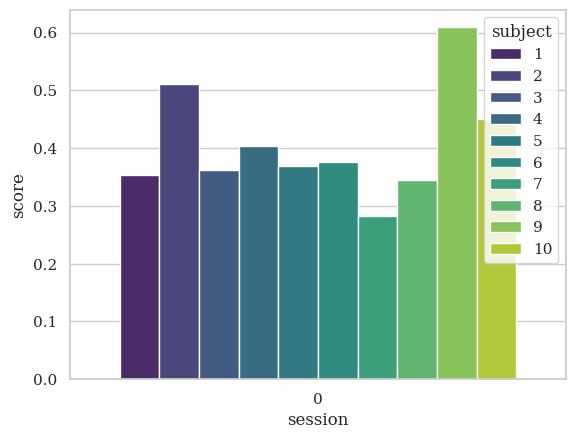

In [9]:
plt.figure()
sns.barplot(data=results, y="score", x="session", hue="subject", palette="viridis")

And the computation time in seconds



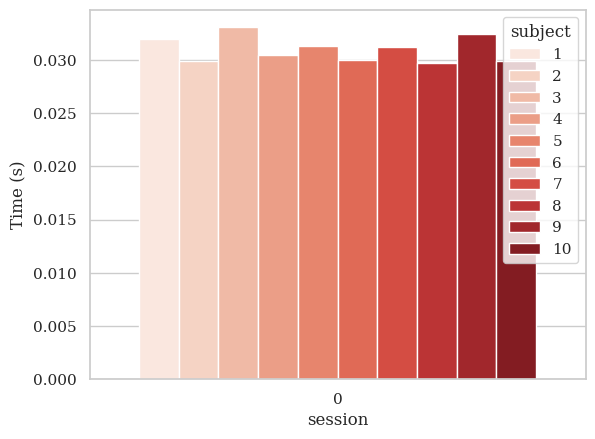

In [10]:
plt.figure()
ax = sns.barplot(data=results, y="time", x="session", hue="subject", palette="Reds")
ax.set_ylabel("Time (s)")
plt.show()